Opportunity dataset preprocessing (for gestures)

Main paper: [The Opportunity challenge: A benchmark database for on-body sensor-based activity recognition](https://www.sciencedirect.com/science/article/pii/S0167865512004205)

Details about dataset: [OPPORTUNITY Activity Recognition Data Set](https://archive.ics.uci.edu/ml/datasets/opportunity+activity+recognition)

Sampling rate: 30 Hz 

113  channels:

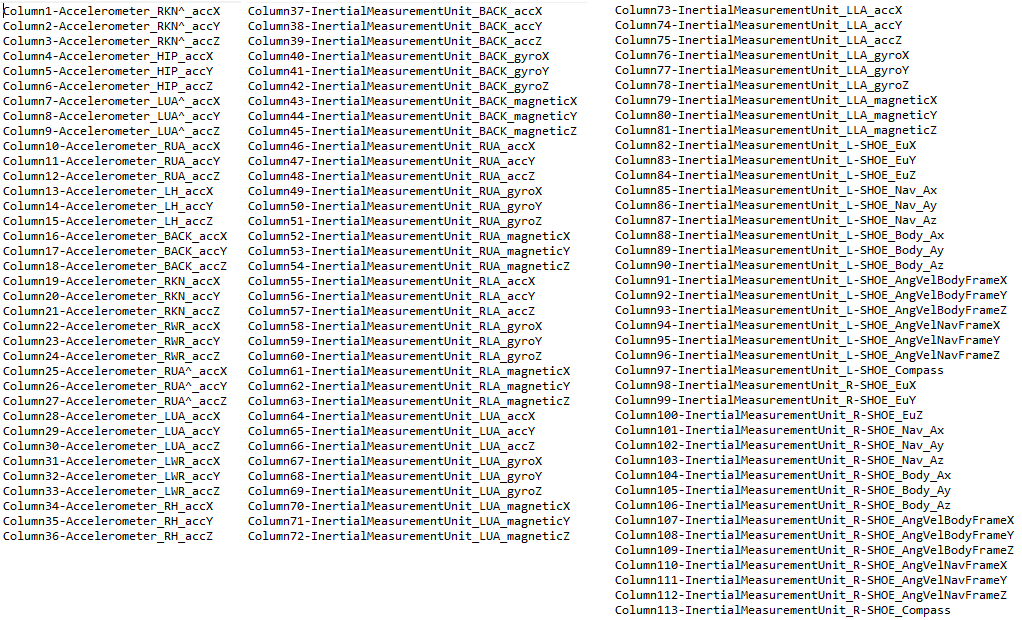


Gestures:

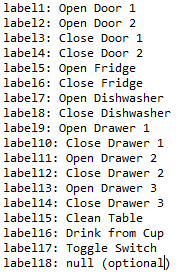

In [14]:
import datetime
e = datetime.datetime.now()
print ("Today's date:  = %s/%s/%s" % (e.day, e.month, e.year))
print ("The time is now: = %s:%s:%s" % (e.hour, e.minute, e.second))

Today's date:  = 10/9/2022
The time is now: = 10:40:20


In [15]:

# https://github.com/AniMahajan20/DeepConvLSTM-NNFL 

import numpy as np
import os
import zipfile
import numpy as np
import pickle as cp
from io import BytesIO
from pandas import Series


# Number of sensor channels used in the OPPORTUNITY challenge
NB_SENSOR_CHANNELS = 113

# Names of the files defining the OPPORTUNITY challenge data. As named in the original data.
OPPORTUNITY_DATA_FILES = ['OpportunityUCIDataset/dataset/S1-Drill.dat',
                          'OpportunityUCIDataset/dataset/S1-ADL1.dat',
                          'OpportunityUCIDataset/dataset/S1-ADL2.dat',
                          'OpportunityUCIDataset/dataset/S1-ADL3.dat',
                          'OpportunityUCIDataset/dataset/S1-ADL4.dat',
                          'OpportunityUCIDataset/dataset/S1-ADL5.dat',
                          'OpportunityUCIDataset/dataset/S2-Drill.dat',
                          'OpportunityUCIDataset/dataset/S2-ADL1.dat',
                          'OpportunityUCIDataset/dataset/S2-ADL2.dat',
                          'OpportunityUCIDataset/dataset/S2-ADL3.dat',
                          'OpportunityUCIDataset/dataset/S3-Drill.dat',
                          'OpportunityUCIDataset/dataset/S3-ADL1.dat',
                          'OpportunityUCIDataset/dataset/S3-ADL2.dat',
                          'OpportunityUCIDataset/dataset/S3-ADL3.dat',
                          'OpportunityUCIDataset/dataset/S2-ADL4.dat',
                          'OpportunityUCIDataset/dataset/S2-ADL5.dat',
                          'OpportunityUCIDataset/dataset/S3-ADL4.dat',
                          'OpportunityUCIDataset/dataset/S3-ADL5.dat'
                          ]

# Global maximums and minimums for each of the 113 sensor channels used in the OPPORTUNITY challenge
MAX_THRESHOLDS = [3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,
                       3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,
                       3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,
                       3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,   3000,
                       3000,   3000,   3000,   10000,  10000,  10000,  1500,   1500,   1500,
                       3000,   3000,   3000,   10000,  10000,  10000,  1500,   1500,   1500,
                       3000,   3000,   3000,   10000,  10000,  10000,  1500,   1500,   1500,
                       3000,   3000,   3000,   10000,  10000,  10000,  1500,   1500,   1500,
                       3000,   3000,   3000,   10000,  10000,  10000,  1500,   1500,   1500,
                       250,    25,     200,    5000,   5000,   5000,   5000,   5000,   5000,
                       10000,  10000,  10000,  10000,  10000,  10000,  250,    250,    25,
                       200,    5000,   5000,   5000,   5000,   5000,   5000,   10000,  10000,
                       10000,  10000,  10000,  10000,  250, ]

MIN_THRESHOLDS = [-3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,
                       -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,
                       -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,
                       -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,  -3000,
                       -3000,  -3000,  -3000,  -10000, -10000, -10000, -1000,  -1000,  -1000,
                       -3000,  -3000,  -3000,  -10000, -10000, -10000, -1000,  -1000,  -1000,
                       -3000,  -3000,  -3000,  -10000, -10000, -10000, -1000,  -1000,  -1000,
                       -3000,  -3000,  -3000,  -10000, -10000, -10000, -1000,  -1000,  -1000,
                       -3000,  -3000,  -3000,  -10000, -10000, -10000, -1000,  -1000,  -1000,
                       -250,   -100,   -200,   -5000,  -5000,  -5000,  -5000,  -5000,  -5000,
                       -10000, -10000, -10000, -10000, -10000, -10000, -250,   -250,   -100,
                       -200,   -5000,  -5000,  -5000,  -5000,  -5000,  -5000,  -10000, -10000,
                       -10000, -10000, -10000, -10000, -250, ]


def select_columns(data):
    # Channels to be excluded
    features_delete = np.arange(46, 50) #BACK Quaternion
    features_delete = np.concatenate([features_delete, np.arange(59, 63)])#RUA Quaternion1
    features_delete = np.concatenate([features_delete, np.arange(72, 76)])#RLA Quaternion
    features_delete = np.concatenate([features_delete, np.arange(85, 89)])#LUA Quaternion
    features_delete = np.concatenate([features_delete, np.arange(98, 102)])#LLA Quaternion
    features_delete = np.concatenate([features_delete, np.arange(134, 243)])# CUP, SALAMI, WATER, CHEESE, BREAD, KNIFE1, MILK, SPOON,
                                                                            # SUGAR, KNIFE2, PLATE, GLASS, REED SWITCH, DOOR1, LAZYCHAIR, DOOR2, DISHWASHER,
                                                                            # UPPERDRAWER, LOWER DRAWER, MIDDLEDRAWER, FRIDGE, LOCATION
    features_delete = np.concatenate([features_delete, np.arange(244, 249)])# Label columns (except Locomotion label (244))
    return np.delete(data, features_delete, 1)


def norm(data, max_list, min_list):
    max_list, min_list = np.array(max_list), np.array(min_list)
    diff = max_list - min_list
    for i in np.arange(data.shape[1]):
        data[:, i] = (data[:, i]-min_list[i])/diff[i]

    data[data > 1] = 0.99
    data[data < 0] = 0.00
    return data


def check_data(data_set):
    print ("Checking dataset {0}".format(data_set))
    data_dir, data_file = os.path.split(data_set)
    # When a directory is not provided, check if dataset is in the data directory
    if data_dir == "" and not os.path.isfile(data_set):
        new_path = os.path.join(os.path.split(__file__)[0], "data", data_set)
        if os.path.isfile(new_path) or data_file == 'OpportunityUCIDataset.zip':
            data_set = new_path

    # When dataset not found, try to download it from UCI repository
    if (not os.path.isfile(data_set)) and data_file == 'OpportunityUCIDataset.zip':
        print ("... dataset path {0} not found".format(data_set))
        import urllib.request
        origin = (
            'https://archive.ics.uci.edu/ml/machine-learning-databases/00226/OpportunityUCIDataset.zip'
        )
        if not os.path.exists(data_dir):
            print ("... creating directory {0}".format(data_dir))
            os.makedirs(data_dir)
        print ("... downloading data from {0}".format(origin))
        urllib.request.urlretrieve(origin, data_set)

    return data_dir


def process_dataset_file(data):
    # Select only required columns
    data = select_columns(data)

    # Colums are divided into features and labels
    data_x = data[:, 1:114]
    data_y = data[:, 115] # use 114 instead of 115 for locomotions (5 classes) 

    # Labels for gestures are adjusted
    data_y[data_y == 406516] = 1
    data_y[data_y == 406517] = 2
    data_y[data_y == 404516] = 3
    data_y[data_y == 404517] = 4
    data_y[data_y == 406520] = 5
    data_y[data_y == 404520] = 6
    data_y[data_y == 406505] = 7
    data_y[data_y == 404505] = 8
    data_y[data_y == 406519] = 9
    data_y[data_y == 404519] = 10
    data_y[data_y == 406511] = 11
    data_y[data_y == 404511] = 12
    data_y[data_y == 406508] = 13
    data_y[data_y == 404508] = 14
    data_y[data_y == 408512] = 15
    data_y[data_y == 407521] = 16
    data_y[data_y == 405506] = 17
    data_y = data_y.astype(int)

    '''
    # Labels for locomotions 
    # 1 Stand
    # 2 Walk
    data_y[data_y == 4] = 3
    data_y[data_y == 5] = 4
    '''

    # Perform linear interpolation
    data_x = np.array([Series(i).interpolate() for i in data_x.T]).T

    # Remaining missing data is replaced with 0
    data_x[np.isnan(data_x)] = 0

    # Normalize sensor channels
    data_x = norm(data_x, MAX_THRESHOLDS, MIN_THRESHOLDS)

    return data_x, data_y


def generate_data(dataset, target_filename):
    data_dir = check_data(dataset)

    data_x = np.empty((0, NB_SENSOR_CHANNELS))
    data_y = np.empty((0))

    zf = zipfile.ZipFile(dataset)
    print ("Processing dataset files ...")
    for filename in OPPORTUNITY_DATA_FILES:
        try:
            data = np.loadtxt(BytesIO(zf.read(filename)))
            print ("... file {0}".format(filename))
            x, y = process_dataset_file(data)
            data_x = np.vstack((data_x, x))
            data_y = np.concatenate([data_y, y])
        except KeyError:
            print ("ERROR: Did not find {0} in zip file".format(filename))

    obj = [data_x, data_y]
    f = open(os.path.join(data_dir, target_filename), 'wb')
    cp.dump(obj, f, protocol=cp.HIGHEST_PROTOCOL)
    f.close()

generate_data("data/OpportunityUCIDataset.zip", "oppChallenge_gestures.data")

Checking dataset data/OpportunityUCIDataset.zip
Processing dataset files ...
... file OpportunityUCIDataset/dataset/S1-Drill.dat
... file OpportunityUCIDataset/dataset/S1-ADL1.dat
... file OpportunityUCIDataset/dataset/S1-ADL2.dat
... file OpportunityUCIDataset/dataset/S1-ADL3.dat
... file OpportunityUCIDataset/dataset/S1-ADL4.dat
... file OpportunityUCIDataset/dataset/S1-ADL5.dat
... file OpportunityUCIDataset/dataset/S2-Drill.dat
... file OpportunityUCIDataset/dataset/S2-ADL1.dat
... file OpportunityUCIDataset/dataset/S2-ADL2.dat
... file OpportunityUCIDataset/dataset/S2-ADL3.dat
... file OpportunityUCIDataset/dataset/S3-Drill.dat
... file OpportunityUCIDataset/dataset/S3-ADL1.dat
... file OpportunityUCIDataset/dataset/S3-ADL2.dat
... file OpportunityUCIDataset/dataset/S3-ADL3.dat
... file OpportunityUCIDataset/dataset/S2-ADL4.dat
... file OpportunityUCIDataset/dataset/S2-ADL5.dat
... file OpportunityUCIDataset/dataset/S3-ADL4.dat
... file OpportunityUCIDataset/dataset/S3-ADL5.dat


In [16]:
def load_dataset(filename):

    f = open(filename, 'rb')
    data = cp.load(f)
    f.close()

    data_x, data_y = data[0], data[1]

    print(" ..from file {}".format(filename))
    print(" ..reading instances: data_x {0}, data_y {1}".format(data_x.shape, data_y.shape))

    data_x = data_x.astype(np.float32)
    # The targets are casted to int8 for GPU compatibility.
    data_y = data_y.astype(np.uint8)

    return data_x, data_y

print("Loading data...")
data_x, data_y = load_dataset('data/oppChallenge_gestures.data')


Loading data...
 ..from file data/oppChallenge_gestures.data
 ..reading instances: data_x (676713, 113), data_y (676713,)


In [17]:
from collections import Counter
NUM_CLASSES = len(Counter(data_y).keys())
print("NUM_CLASSES: ", NUM_CLASSES)
print(*Counter(data_y))

NUM_CLASSES:  18
0 5 6 7 8 9 10 11 12 13 14 3 1 4 2 17 15 16


Train test split

Segmenting with/without sliding window

